<a href="https://colab.research.google.com/github/handielg/Python/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Material de Estudio](https://github.com/joanby/machinelearning-az/blob/master/additional%20materials/transparencias/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/s2.pdf)

In [14]:
# Regresión Lineal Simple
# Cómo importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression #para descargar el modelo lineal simple que vamos a usar.

In [62]:
dataset = pd.DataFrame({"Metros Cuadrados": [1940,1300,1420,1680,1270,1850,1000,1100,1600,1000,2150,1900,2200,1100,860,1325,1350,1600, 950,1250], "Precio": [1116000,860000,818400,1000000,640000,1010000,600000,700000,1100000,570000,860000,1085000,1250000,850000,640000,900000,730000,750000,650000,680000]})

In [63]:
dataset

,Metros Cuadrados,Precio
0,1940,1116000
1,1300,860000
2,1420,818400
3,1680,1000000
4,1270,640000
5,1850,1010000
6,1000,600000
7,1100,700000
8,1600,1100000
9,1000,570000


In [114]:
X = dataset.iloc[:, :-1].values #debemos hacerlo de esta forma para que nos quede como abajo o X.reshape(-1, 1) en otros casos.
y = dataset.iloc[:, 1].values

In [88]:
X

array([[1940],
       [1300],
       [1420],
       [1680],
       [1270],
       [1850],
       [1000],
       [1100],
       [1600],
       [1000],
       [2150],
       [1900],
       [2200],
       [1100],
       [ 860],
       [1325],
       [1350],
       [1600],
       [ 950],
       [1250]])

In [87]:
y

array([1116000,  860000,  818400, 1000000,  640000, 1010000,  600000,
        700000, 1100000,  570000,  860000, 1085000, 1250000,  850000,
        640000,  900000,  730000,  750000,  650000,  680000])

In [76]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) #definimos 1/3 para que sea 66 % entrenamiento y 33 % test. Y creamos 4 variables nuevas.

In [44]:
# Escalado de variables. No aplica en este algoritmo.
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n'

In [83]:
# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento
regression = LinearRegression()
regression.fit(X_train, y_train) #le pasamos al modelo la X de entrenamiento y la y de entrenamiento. El método fit se utiliza para ajustar la regresión lineal, y acepta 2 parámetros, los dos que les pasamos, X_train y y_train.

# Predecir el conjunto de test
y_pred = regression.predict(X_test) #predecimos la variable dependiente con X_test. X_test solo contiene la primer columna.
y_pred 

array([ 628411.24014739,  793801.58737529,  770174.39491416,
        935564.74214206, 1195463.85921447,  935564.74214206,
        652038.43260852])

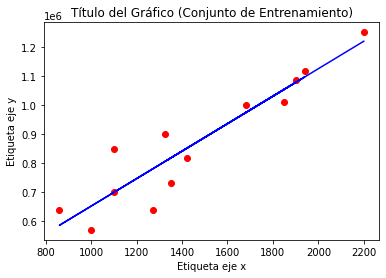

In [78]:
# Visualizar los resultados de entrenamiento
plt.scatter(X_train, y_train, color = "red") #Graficamos los puntos correspondientes al conjunto de entrenamiento.
plt.plot(X_train, regression.predict(X_train), color = "blue") #Graficamos la línea de la ecuación obtenida en el entrenamiento.
plt.title("Título del Gráfico (Conjunto de Entrenamiento)")
plt.xlabel("Etiqueta eje x")
plt.ylabel("Etiqueta eje y")
plt.show()

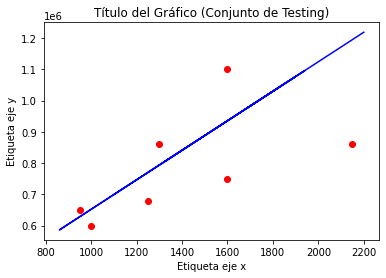

In [79]:
# Visualizar los resultados de test
plt.scatter(X_test, y_test, color = "red") #Graficamos los puntos (scatter) de la variable independiente y la variable dependiente predicha por el modelo de regresión.
plt.plot(X_train, regression.predict(X_train), color = "blue") #Dibujamos la misma línea anterior para ver como se ajustan los puntos predichos.
plt.title("Título del Gráfico (Conjunto de Testing)")
plt.xlabel("Etiqueta eje x")
plt.ylabel("Etiqueta eje y")
plt.show()

**Pendiente**

In [116]:
regression.coef_.item()

472.54384922256315

**Intercepto**

In [113]:
regression.intercept_

179494.58338595484

**Coeficiente de determinación**

In [115]:
regression.score(X, y)

0.6459717095840944

#Este es **otro ejemplo** de regresión lineal, encontrarremos la rwlaciín entre los metros cuadrados de las casas y su precio.

Necesitamos una herramienta que nos permita medir dicha propiedad y nos permita distinguir las regresiones con un buen poder explicativo razonable y pobre. Para eso usamos un indicador que se llama $$R^2$$.

Por lo general, nuestro R cuadrado se considera como un valor porcentual y puede variar de 0 a 100 por ciento. Cuanto mayor sea, mayor será el poder explicativo del modelo de regresión. Típicamente, una regresión simple con una R al cuadrado de menos del 10 por ciento tiene poco valor predictivo. Una regresión variable con una R al cuadrado del 30 por ciento o más son indicadores sólidos de rendimiento futuro.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_excel('D:/Python/Data_Files/Housing.xlsx')

In [ ]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [ ]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

In [119]:
#X es el valor de los metros cuadrados de las casas.
X = np.array([1940,1300,1420,1680,1270,1850,1000,1100,1600,1000,2150,1900,2200,1100,860,1325,1350,1600, 950,1250])
#Y representa el precio de las casas
Y = np.array([1116000,860000,818400,1000000,640000,1010000,600000,700000,1100000,570000,860000,1085000,1250000,850000,640000,900000,730000,750000,650000,680000])

In [94]:
X.reshape(-1, 1)

array([[1940],
       [1300],
       [1420],
       [1680],
       [1270],
       [1850],
       [1000],
       [1100],
       [1600],
       [1000],
       [2150],
       [1900],
       [2200],
       [1100],
       [ 860],
       [1325],
       [1350],
       [1600],
       [ 950],
       [1250]])

In [95]:
Y

array([1116000,  860000,  818400, 1000000,  640000, 1010000,  600000,
        700000, 1100000,  570000,  860000, 1085000, 1250000,  850000,
        640000,  900000,  730000,  750000,  650000,  680000])

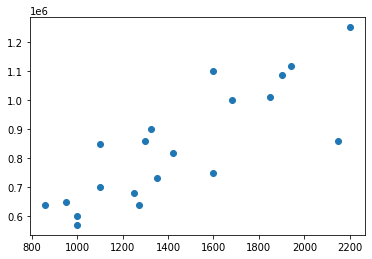

In [120]:
plt.scatter(X,Y)
plt.show()

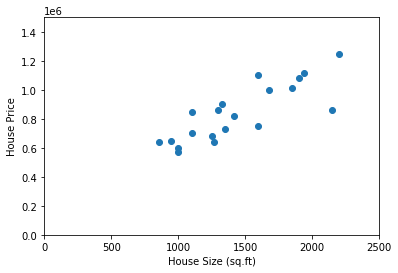

In [121]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000]) #ajustamos los ejes, el primer gráfico es engañoso.
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

In [122]:
X1 = sm.add_constant(X) #creamos una constante con la variable X.
reg = sm.OLS(Y, X1).fit() #entrenamos el modelo.

In [123]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           8.13e-06
Time:                        18:42:41   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
x1           401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El valor de $R^2$ obtenido, significa que la variable independiente en el tamaño de nuestra  puede explicar el 67.8 %  de la variable dependiente.  Este valor es mucho mayor al 30 por ciento. Entonces podemos afirmar que nuestro modelo tiene un buen poder explicativo. Por lo tanto, es un buen modelo.

##Alpha, Beta y $R^2$

In [103]:
slope, intercept, r_value, p_value, std_error = stats.linregress(X, Y)

Pendiente

In [104]:
slope 

401.91628631922595

Intercepto

In [105]:
intercept

260806.2360560964

In [124]:
 r_value**2 #debemos elevar al cuadrado para obtener el valor de R^2.

0.678279986579124

In [107]:
p_value

8.129642377231308e-06

El error estándar de  65 dólares nos dice que un aumento de 401 dólares (pendiente) generalmente variará dentro de un rango de 65 dólares.

In [108]:
std_error

65.24299510636492

#Regresión lineal con TensorFlow

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0'

#Definir y compilar la red neuronal
A continuación crearemos la red neuronal más simple posible. Tiene 1 capa, y esa capa tiene 1 neurona, y la forma de entrada a ella es sólo 1 valor.

In [4]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Ahora compilamos nuestra Red Neural. Cuando lo hacemos, tenemos que especificar 2 funciones, una pérdida y un optimizador.

Si ha visto muchas matemáticas para el aprendizaje automático, aquí es donde se suele usar, pero en este caso está bien encapsulado en funciones para usted. Pero lo que pasa aquí— vamos a explicar...

Sabemos que en nuestra función, la relación entre los números es y=2x-1.

Cuando el ordenador está tratando de 'aprender' eso, hace una suposición... tal vez y = 10x +10. La función LOSS mide las respuestas adivinadas con respecto a las respuestas correctas conocidas y mide qué tan bien o qué tan mal lo hizo.

A continuación, utiliza la función OPTIMIZER para hacer otra suposición. En función de cómo fue la función de pérdida, tratará de minimizar la pérdida. En ese momento tal vez se le ocurre un poco como y = 5x + 5, que, si bien todavía es bastante malo, está más cerca del resultado correcto (es decir, la pérdida es menor)

Se repetirá esto para el número de EPOCHS que verá en breve. Pero primero, así es como le decimos que use 'MEAN SQUARED ERROR' para la pérdida y 'STOCHASTIC GRADIENT DESCENT' para el optimizador. Usted no necesita entender las matemáticas para estos todavía, pero se puede ver que funcionan!.

Con el tiempo aprenderá las diferentes y apropiadas funciones de pérdida y optimizador para diferentes escenarios.

In [5]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [6]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

#Training the Neural Network

El proceso de entrenamiento de la red neuronal, donde 'aprende' la relación entre las X y las Ys está en la llamada model.fit. Aquí es donde va a pasar por el bucle que hablamos anteriormente, haciendo una suposición, midiendo lo bueno o malo que es (también conocido como la pérdida), el uso del opimizer para hacer otra suposición, etc. Lo hará por el número de épocas que especifique. Cuando ejecute este código, verá la pérdida en el lado derecho. En cada epoch se realiza una conjetura, usamos la función de pérdida para averiguar lo bien o mal que lo hizo. Luego usamos el optimizador para hacer otra conjetura.

In [ ]:
model.fit(xs, ys, epochs=1000, verbose = 0)

Ok, ahora tienes un modelo que ha sido entrenado para aprender la relación entre X e Y. Puede utilizar el método model.predict para que descubra la Y de una X previamente conocida. Así, por ejemplo, si X es 1000, ¿qué crees que será Y? Adivine antes de ejecutar este código:

In [8]:
print(model.predict([10.0]))

[[18.999916]]


De esta forma podemos saber cuales son los parámetros de la función y = mx + n.

In [9]:
#Nuestra red tiene una sola capa. 
#Permite mostrar el valor de m & b en la ecuación lineal y = mx + b

#print(model.layers)
m,n = model.layers[0].get_weights()
print("El valor de m es :",m)
print("El valor de n es: ", n)

El valor de m es : [[1.999988]]
El valor de n es:  [-0.999964]
